<a href="https://colab.research.google.com/github/ahcamachod/1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen muchas dimensiones, lo recomendable es tomar dichos datos y transformarlos de modo que se ajusten a un espacio dimensional menor asegurándonos de que el espacio dimensional resultante mantenga las propiedades que mejor caracterizan a los datos originales, garantizando su dimensión intrínseca.


En este notebook, estaremos aprendiendo varias estrategias para lidiar con la alta dimensionalidad en el modelaje de aprendizaje de máquina.


El dataset empleado en el desarrollo de este proyecto es un dataset ficticio, llamado a ```aluracare.csv```, adaptado a nuestro contexto, tomando como referencia el siguiente dataset:  

*Dataset:* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# 1. Datos con muchas dimensiones

##### *https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [2]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\\USUARIO\\Downloads\\1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones-main\\1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones-main\\aluracare.csv')

In [4]:
dataset.diagnostico.value_counts()

diagnostico
B    357
M    212
Name: count, dtype: int64

In [7]:
dataset.isna().sum()

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

In [35]:
dataset.drop(columns=['id','examen_33'])
dataset.columns

Index(['id', 'diagnostico', 'examen_1', 'examen_2', 'examen_3', 'examen_4',
       'examen_5', 'examen_6', 'examen_7', 'examen_8', 'examen_9', 'examen_10',
       'examen_11', 'examen_12', 'examen_13', 'examen_14', 'examen_15',
       'examen_16', 'examen_17', 'examen_18', 'examen_19', 'examen_20',
       'examen_21', 'examen_22', 'examen_23', 'examen_24', 'examen_25',
       'examen_26', 'examen_27', 'examen_28', 'examen_29', 'examen_30',
       'examen_31', 'examen_32', 'examen_33'],
      dtype='object')

In [23]:
dataset.diagnostico.replace('M',1, inplace=True)
dataset.diagnostico.replace('B',0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=dataset.drop(columns=['id','examen_33','diagnostico'], axis=1)
y=dataset.diagnostico
x_std= StandardScaler().fit_transform(x)

x_train,x_test, y_train, y_test =train_test_split(x_std, y, random_state=42,test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
Logistic =LogisticRegression(C=1,n_jobs=-1)
Logistic.fit(x_train, y_train)

LogisticRegression(C=1, n_jobs=-1)

In [32]:
Logistic.score(x_test,y_test)

0.9824561403508771

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
forest.score(x_test, y_test)

0.9649122807017544

# 2. Avanzando y explorando los datos

##### *https://seaborn.pydata.org/introduction.html*
*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

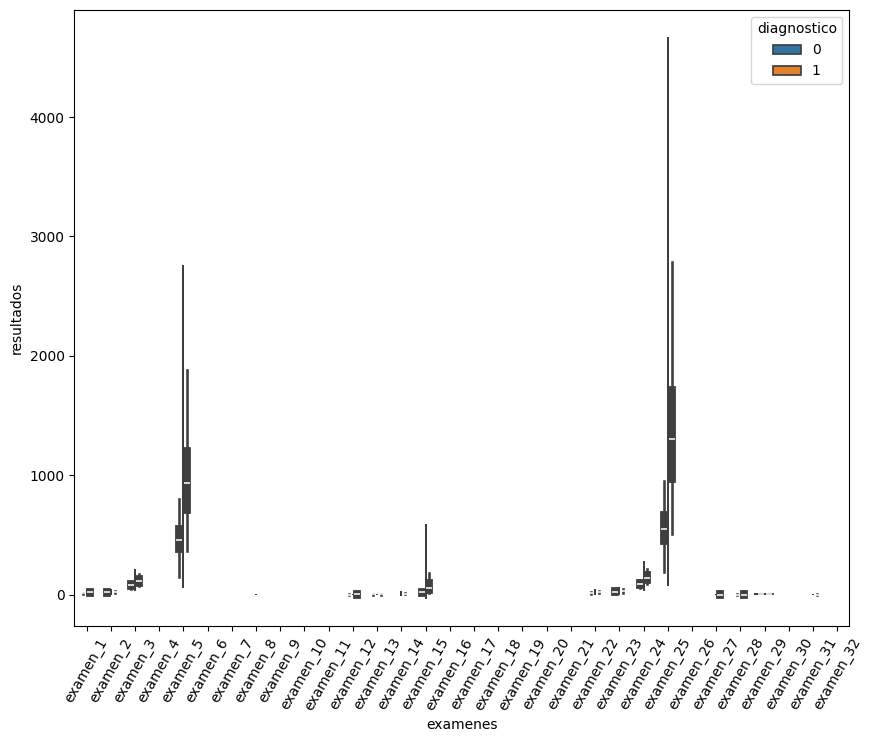

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt  # Cambia 'matplotlib' por 'matplotlib.pyplot'
import pandas as pd

datos = pd.concat([y, x], axis=1)
datos = pd.melt(datos, id_vars='diagnostico', var_name='examenes', value_name='resultados')

plt.figure(figsize=(10, 8))
sns.violinplot(data=datos, x='examenes', y='resultados', hue='diagnostico',split=True)
plt.xticks(rotation=60)
plt.show()


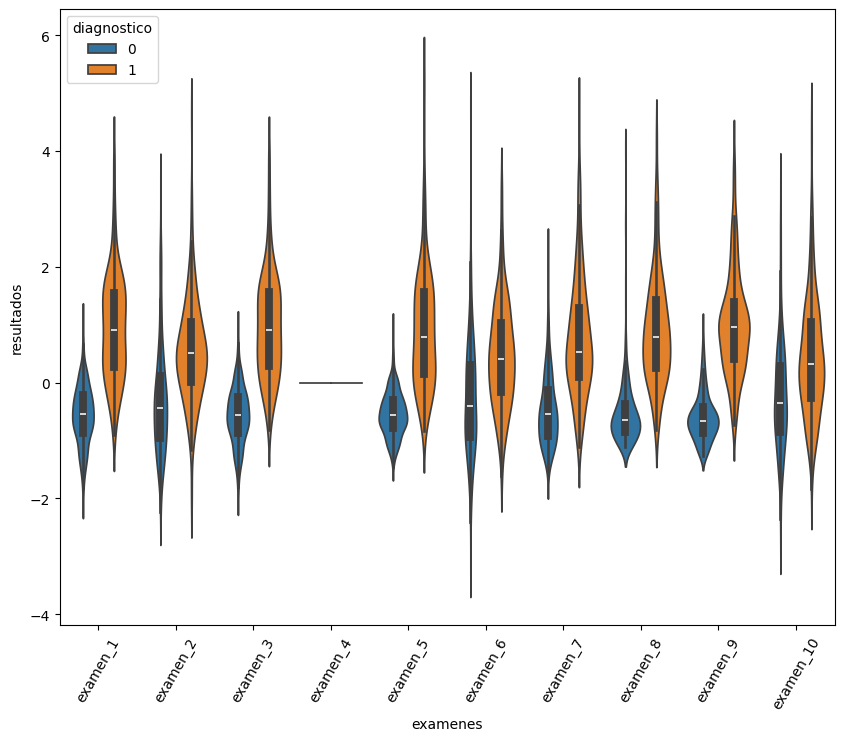

In [42]:
x1=pd.DataFrame(x_std,columns=x.keys())
def violin(inicio, fin):
    datos = pd.concat([y, x1.iloc[:,inicio:fin]], axis=1)
    datos = pd.melt(datos, id_vars='diagnostico', var_name='examenes', value_name='resultados')
    plt.figure(figsize=(10, 8))
    sns.violinplot(data=datos, x='examenes', y='resultados', hue='diagnostico')
    plt.xticks(rotation=60)

violin(0,10)

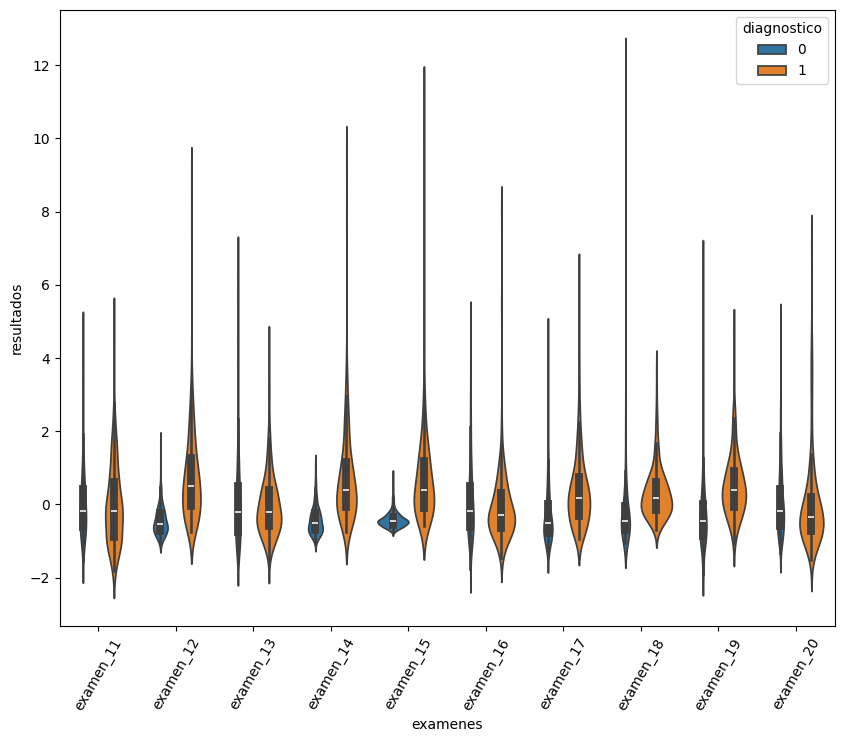

In [43]:
violin(10,20)

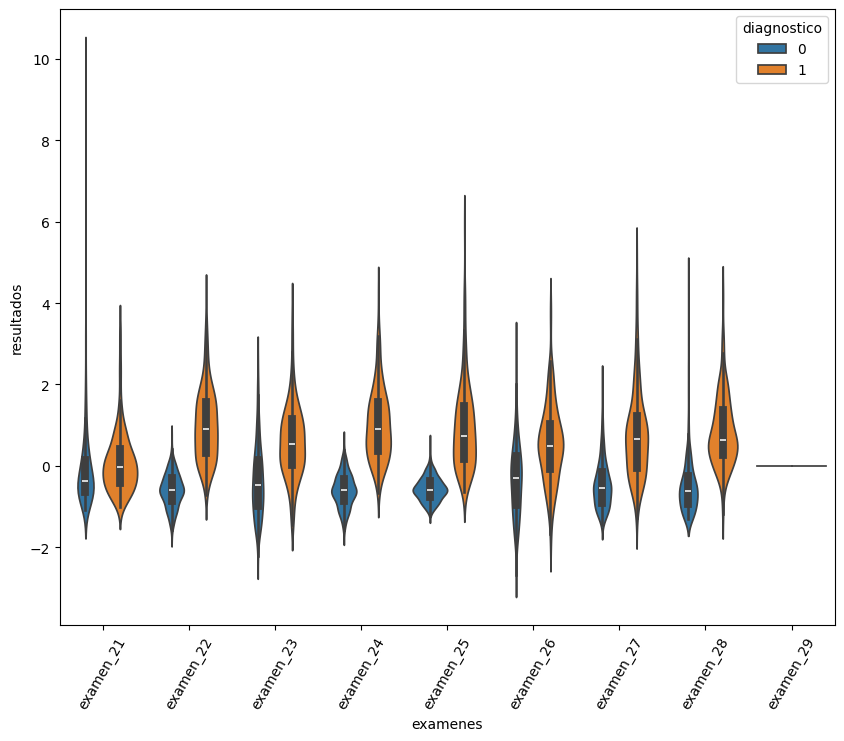

In [44]:
violin(20,29)

In [45]:
x2=x1.drop(columns=['examen_29','examen_4'], axis=1)

In [ ]:
def puntaje(resultados):
    x_train,x_test, y_train, y_test =train_test_split(resultados, y, random_state=42,test_size=0.3)
    Logistic =LogisticRegression(C=1,n_jobs=-1)
    Logistic.fit(x_train, y_train)
    return f'La exactitud es:{round(Logistic.score(x_test, y_test)*100,2)}%'
print(puntaje(x1))

La exactitud es:98.25%


In [52]:
print(puntaje(x2))

La exactitud es:98.25%


# 3. Datos correlacionados

# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

# 5. Visualizando los datos en el plano

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*